<a href="https://colab.research.google.com/github/YangChingNM6104127/Pytorch_tutorial.ipynb/blob/main/Pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get started with Pytorch! 


Instructor: Yu-Che Tsai, National Taiwan University Department of Computer Science and Information Engineering.

This notebook will be introducing **Pytorch**: a powerful framework for deep learning.

The roadmap of learning pytorch would be as follow:
* Installation pytorch with GPU/CPU support
* From numpy to tensor
* Building your first nueral network

## Installation pytorch with GPU/CPU support



First, you need to install torch using pip 

If you have GPU(s), make sure you install the correct version of torch by following the instruction of Pytorch official website: https://pytorch.org/

In [ ]:
! pip install torch torchvision

In [ ]:
import torch

In [ ]:
# make sure your GPU is detected by torch
torch.cuda.is_available() 

True

## From numpy to tensor

In numpy, we use **Arrays** to apply matrix computation.

To use torch modules for deep learning, we nned to first convert your data in **Tensors**.

In [ ]:
import numpy as np 
import torch

In [ ]:
# Let's compare numpy array and torch tensor
np_arr = np.array([1,2,3])
torch_ten = torch.tensor([1,2,3])
print("Numpy array:",np_arr)
print("Torch tensor:",torch_ten)
print()

# Covert and transform data type between numpy and torch
print("From numpy to torch:", torch.from_numpy(np_arr))
print("From torch to numpy:",torch_ten.numpy())
print()

# Comparing numpy and torch in addition, subtraction
a = np.array([4,5,6])
b = np.array([1,2,3])
print("Numpy addition:",a+b)
print("Numpy subtraction:",a-b)
print()

a = torch.tensor([4,5,6])
b = torch.tensor([1,2,3])
print("Torch addition:",a+b)
print("Torch subtraction:",a-b)
print()

# Dealing with high dimentional data
# use tensor.view(*size) to reshape your tensor
x = torch.arange(9).view(3,3).float() # create a tensor from 0~8 and reshape to 3x3 matrix
print(x,x.shape)
print()

print(torch.mean(x,dim=0))
print(torch.mean(x,dim=1))

# Matrix Multiplication 
matrix_a = torch.tensor([[2,3,4],[5,6,7]]) # 2x3
matrix_b = torch.tensor([[7,8,9,10],[11,12,13,14],[15,16,17,18]]) # 3x4
mul = torch.matmul(matrix_a,matrix_b) # 2x4
print(mul)

Numpy array: [1 2 3]
Torch tensor: tensor([1, 2, 3])

From numpy to torch: tensor([1, 2, 3])
From torch to numpy: [1 2 3]

Numpy addition: [5 7 9]
Numpy subtraction: [3 3 3]

Torch addition: tensor([5, 7, 9])
Torch subtraction: tensor([3, 3, 3])

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]]) torch.Size([3, 3])

tensor([3., 4., 5.])
tensor([1., 4., 7.])
tensor([[107, 116, 125, 134],
        [206, 224, 242, 260]])


## Inclass exercise: Matrix Operation
1. Transform the numpy array `x` into a torch tensor by using `torch.FloatTensor()` 
2. Please create a 10 * 5 matrix $W$ with random initialization by using `torch.rand(*size)`
3. Create a vector $b$ with all elements are 1s
4. Print the output of $x^TW + b$

In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9,10])

''' Please write your code in the following block '''
w = torch.rand(10,5)
b = torch.ones(w.size(1))
output = torch.matmul()


' Please write your code in the following block '

## Accelerating computation cost using GPUs

To use GPU for training neural network, you need to first **transfer data** to GPU devices.

In [ ]:
import time
# Data is stored in CPU by default.
N = 10000
a = torch.rand(N,N)

# Record the start time and compute dot product
start = time.time()
b = torch.matmul(a,a)
end = time.time()
cost = end - start
print("Time cost using CPU:%.4f"%cost)

# Let's transform data into GPU device.
N = 10000
a = torch.rand(N,N).cuda()

# Record the start time and compute dot product
start = time.time()
b = torch.matmul(a,a)
end = time.time()
cost = end - start
print("Time cost using GPU:%.4f"%cost)

del a, b

Time cost using CPU:25.0775
Time cost using GPU:0.0213


## PyTorch as an auto grad framework

Now that we have seen that PyTorch keeps the graph around for us, let's use it to compute some gradients for us.

Consider the function $f(x) = (x-2)^2$.

Q: Compute $\frac{d}{dx} f(x)$ and then compute $f'(1)$.

We make a `backward()` call on the leaf variable (`y`) in the computation, computing all the gradients of `y` at once.

In [ ]:
def f(x):
    return (x-2)**2

def fp(x):
    return 2*(x-2)

x = torch.tensor([1.0], requires_grad=True)

y = f(x)
y.backward()

print('Analytical f\'(x):', fp(x))
print('PyTorch\'s f\'(x):', x.grad)


Analytical f'(x): tensor([-2.], grad_fn=<MulBackward0>)
PyTorch's f'(x): tensor([-2.])


## Use gradient descent to simulate Linear Regression

In statistic, we can derive a close form to find $\beta_0$ and $\beta_1$ that minimize the mean suqared loss.

On the other hand, we can treat it as an optimization problem and use gradient descent to find optimal solution.

Our goal: find $w_0$ and $w_1$ such that $\Sigma_{i=1}^{N} (\hat{y}_i-y_i)^2$ is minimized. 

Where $\hat{y}_i=w_0+w_1x$.

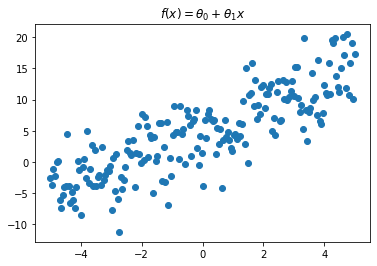

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

# real: f(x) = 2x+5
N = 200
X = np.linspace(-5,5,200)
real_theta0 = 5
real_theta1 = 2

# sample noise from N(0,1)
noise = np.random.randn(N) * 4
y = real_theta0 + real_theta1*X + noise
plt.scatter(X,y)
plt.title("$f(x)={\\theta_0}+{\\theta_1x}$")
plt.show()

In [ ]:
import torch 
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)

# Initialize w from N(0,1). 
w = torch.randn(2).requires_grad_(True) 
print(f"Initial w:\t{w.detach().numpy()}")

def model(X,w):
	return w[0] + X * w[1]

def cost_function(y_hat,y):
	return torch.mean((y_hat-y)**2)

Initial w:	[-0.9962118  -0.95214003]


In [ ]:
iterations = 20
alpha = 0.05 # learning rate

# start training 
print('iter, loss,  w')
for i in range(iterations):
	y_hat = model(X,w)
	loss = cost_function(y_hat,y)
	loss.backward()

	# update w with gradient descent
	w.data = w.data - alpha * w.grad
	print('{},\t{:.2f},\t{}'.format(i, loss.item(), w.view(2).detach().numpy()))

	# clear gradients
	w.grad.detach()
	w.grad.zero_()

iter, loss,  w
0,	13.85,	[4.7971754 1.9181215]
1,	13.85,	[4.7978215 1.9181256]
2,	13.85,	[4.7984033 1.9181263]
3,	13.85,	[4.798927  1.9181265]
4,	13.85,	[4.799398  1.9181265]
5,	13.85,	[4.799822  1.9181265]
6,	13.85,	[4.8002033 1.9181265]
7,	13.85,	[4.8005466 1.9181265]
8,	13.85,	[4.8008556 1.9181265]
9,	13.85,	[4.8011336 1.9181265]
10,	13.85,	[4.801384  1.9181265]
11,	13.85,	[4.8016095 1.9181265]
12,	13.85,	[4.801812  1.9181265]
13,	13.85,	[4.801995  1.9181265]
14,	13.85,	[4.802159  1.9181265]
15,	13.85,	[4.8023067 1.9181265]
16,	13.85,	[4.8024397 1.9181265]
17,	13.85,	[4.8025594 1.9181265]
18,	13.85,	[4.802667  1.9181265]
19,	13.85,	[4.802764  1.9181265]


## Inclass exercise: Quadratic Curve Fitting problem
In this exercise, you will be giving sampled data from a prior distribution: $y=f(x)=2x^2+3+\epsilon$

Your goal is to **design a neural network** to fit the curve as close as possible.

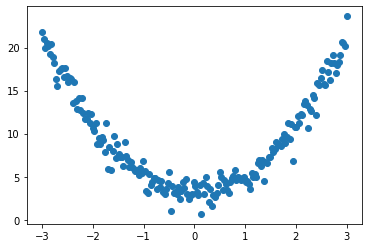

In [ ]:
import torch
import matplotlib.pyplot as plt

N = 200
x = torch.unsqueeze(torch.linspace(-3, 3, N), dim=1)  
y = 2*x.pow(2) + 3 + torch.randn(x.size())  # add random noise to the target                  

# ploting
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [ ]:
import torch.nn as nn

''' Please design your network in the following code block '''
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.layer1 = nn.Linear(1,20)
    self.output = nn.Linear(20,1)

  def forward(self,x):
    h1 = torch.relu(self.layer1(x))
    out = self.output(h1)
    return out

net = Net()
print(net)

Net(
  (layer1): Linear(in_features=1, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=1, bias=True)
)


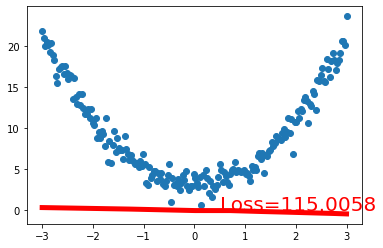

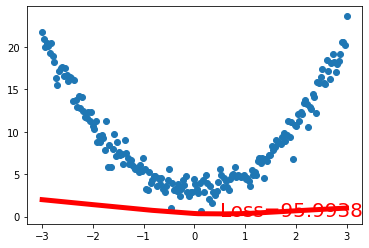

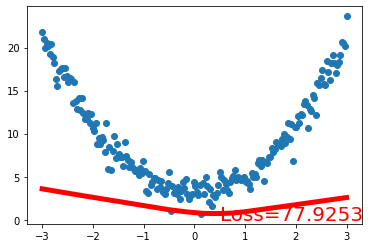

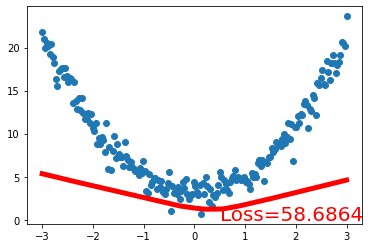

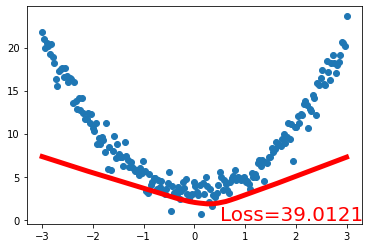

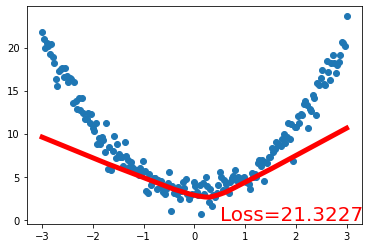

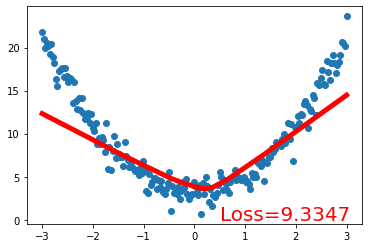

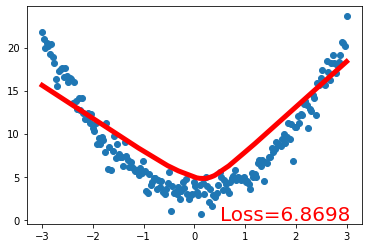

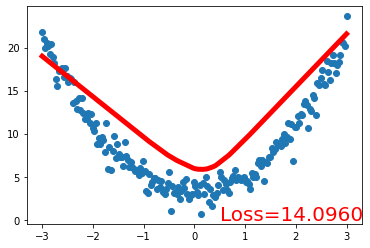

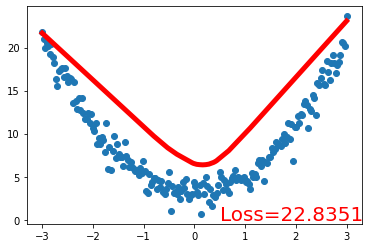

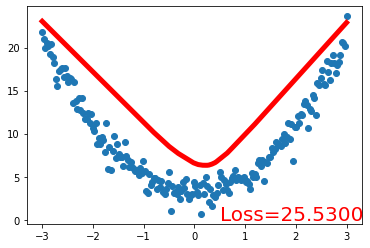

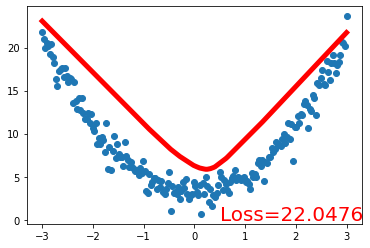

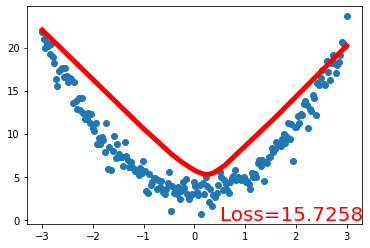

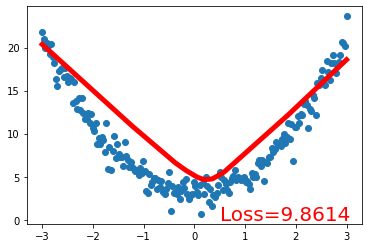

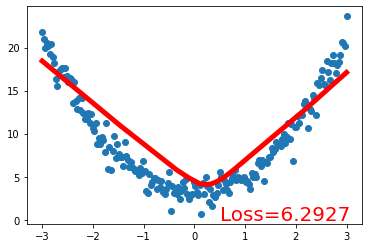

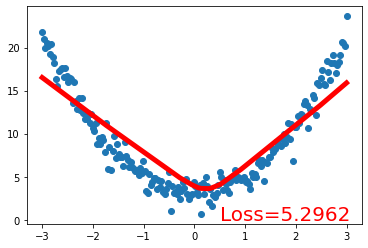

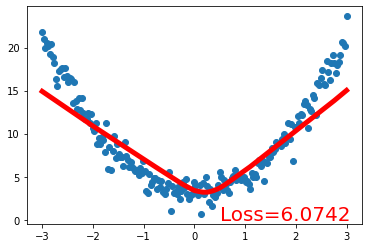

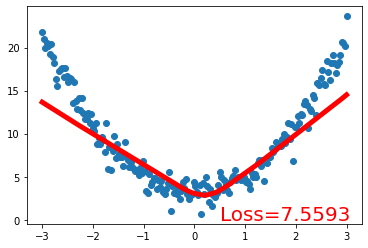

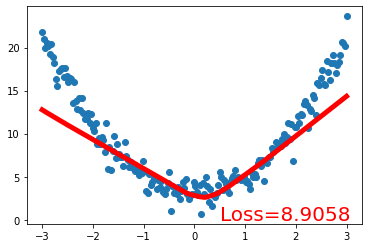

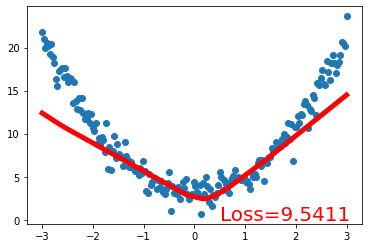

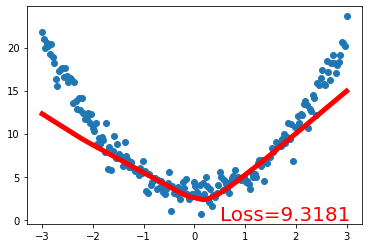

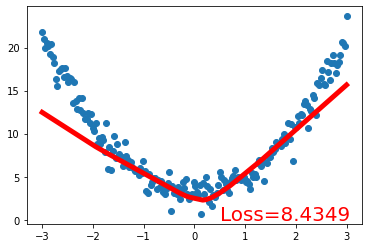

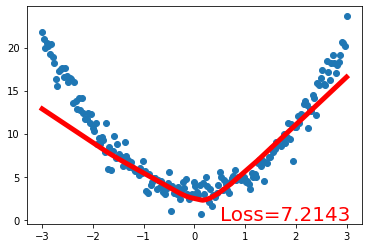

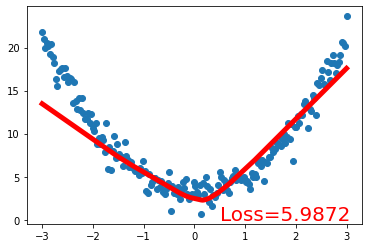

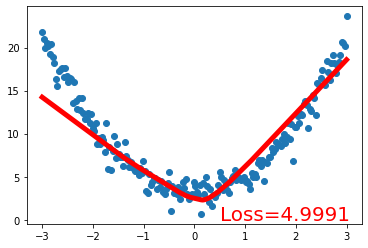

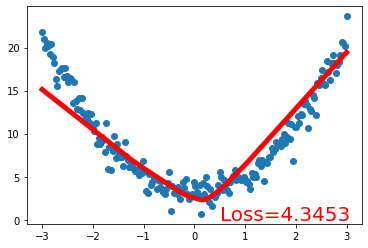

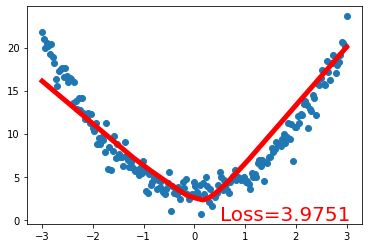

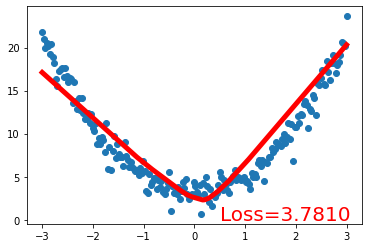

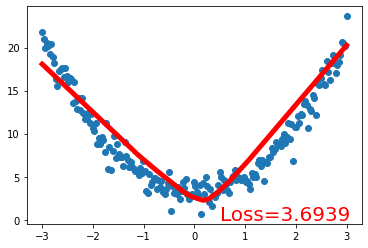

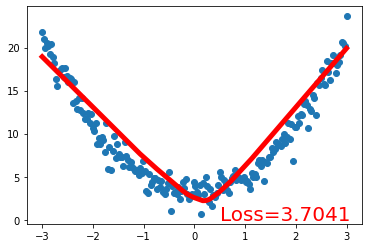

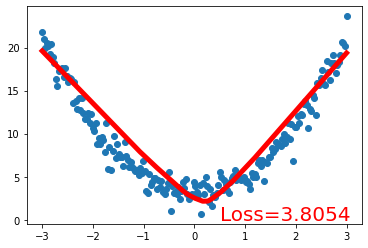

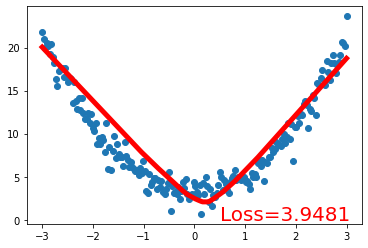

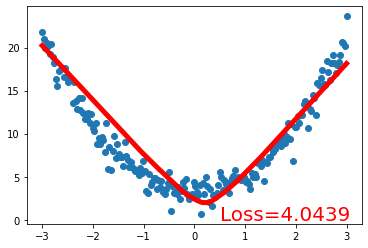

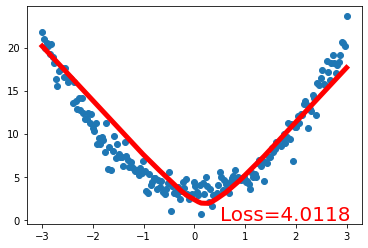

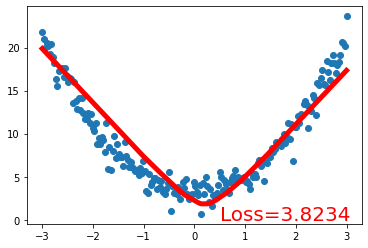

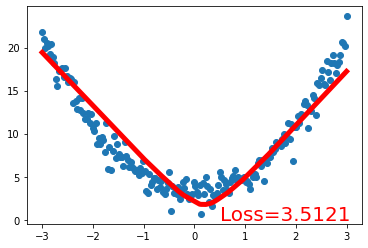

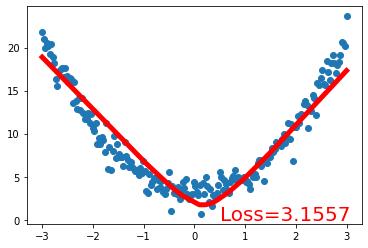

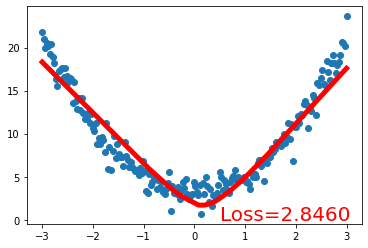

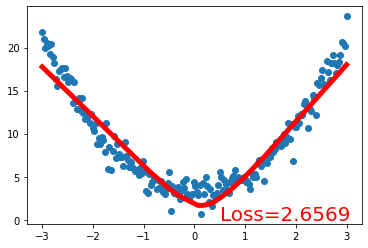

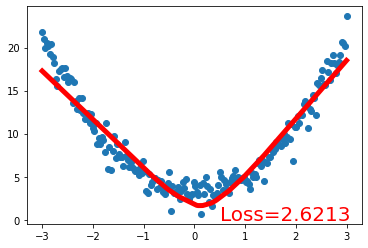

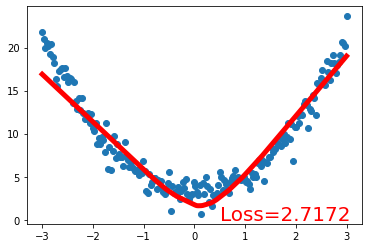

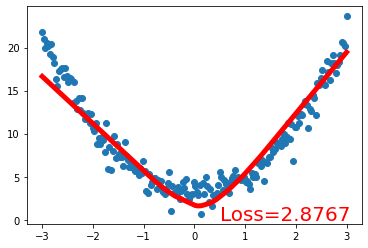

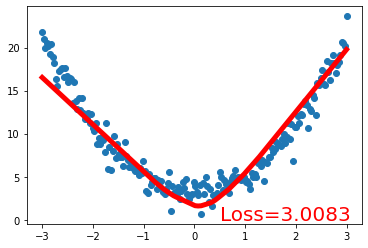

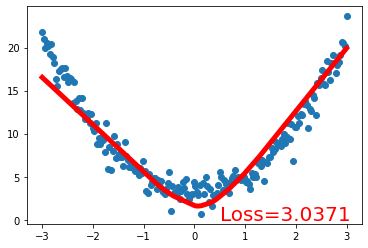

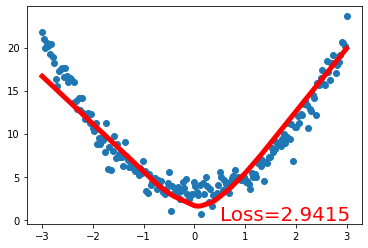

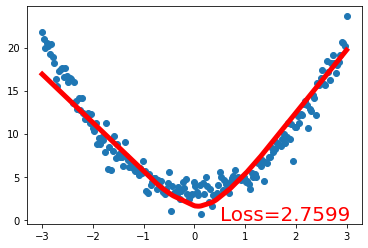

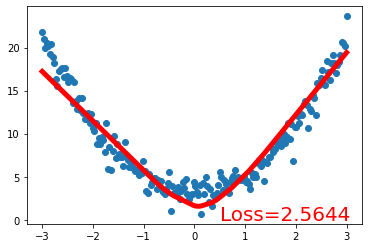

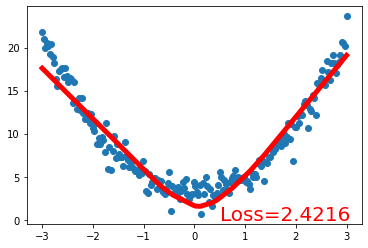

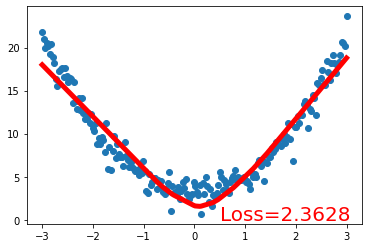

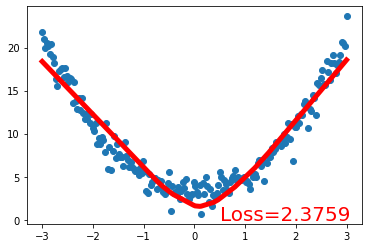

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)  
loss_func = torch.nn.MSELoss()      
iterations = 50
plt.ion()   
plt.show()

for i in range(iterations):
    prediction = net(x)     
    loss = loss_func(prediction, y)     
    optimizer.zero_grad()   
    loss.backward()         
    optimizer.step() 

    # for animation
    plt.cla()
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
    plt.pause(0.1)

plt.ioff()
plt.show() 

## Inclass Exercise: Binary Classification
In this exercise, you have to implement a neural network to complete a binary classification task.

During the training step, you might want to **print the current loss** to make sure the convergence of your model.

Please define your network and carefully choose the activation and loss function.

When the training stage is finished, use `plot_decision_boundary` function to visualize the decision boundary of your model.

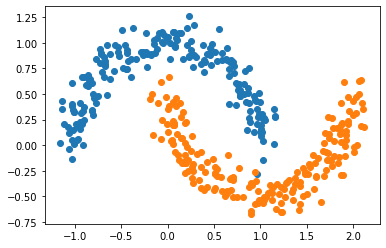

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

X, y = sklearn.datasets.make_moons(400, noise=0.1)
X_a = X[y==0]
X_b = X[y==1]
plt.scatter(X_a[:,0],X_a[:,1])
plt.scatter(X_b[:,0],X_b[:,1])
plt.show()

In [ ]:
# Please write your code in the following block

# Step 1: convert numpy array to torch tensor
tensor_x, tensor_y = torch.FloatTensor(X), torch.FloatTensor(y)

# Step 2: define your network
model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1),
    nn.Sigmoid()
)

# Step 3: choose a optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
loss_function = nn.BCELoss()

# Step 4: start training
iterations = 100
for _ in range(iterations):
    output = model(tensor_x).flatten()
    y_pred = (output > 0.5) * 1. 
    acc = torch.mean((y_pred==tensor_y)*1.)
    loss = loss_function(output, tensor_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("Loss: %.4f, Accuracy: %.4f" % (loss.data.numpy(), acc.detach().numpy()))


Loss: 0.6642, Accuracy: 0.5000
Loss: 0.5845, Accuracy: 0.7700
Loss: 0.5214, Accuracy: 0.7750
Loss: 0.4792, Accuracy: 0.7975
Loss: 0.4131, Accuracy: 0.7975
Loss: 0.3701, Accuracy: 0.8250
Loss: 0.3644, Accuracy: 0.8325
Loss: 0.3398, Accuracy: 0.8600
Loss: 0.3058, Accuracy: 0.8550
Loss: 0.2820, Accuracy: 0.8700
Loss: 0.2679, Accuracy: 0.8750
Loss: 0.2628, Accuracy: 0.8825
Loss: 0.2673, Accuracy: 0.8800
Loss: 0.2708, Accuracy: 0.8750
Loss: 0.2661, Accuracy: 0.8750
Loss: 0.2554, Accuracy: 0.8800
Loss: 0.2447, Accuracy: 0.8825
Loss: 0.2372, Accuracy: 0.8900
Loss: 0.2338, Accuracy: 0.8875
Loss: 0.2329, Accuracy: 0.8900
Loss: 0.2325, Accuracy: 0.8900
Loss: 0.2315, Accuracy: 0.8875
Loss: 0.2297, Accuracy: 0.8875
Loss: 0.2275, Accuracy: 0.8875
Loss: 0.2248, Accuracy: 0.8900
Loss: 0.2230, Accuracy: 0.8900
Loss: 0.2216, Accuracy: 0.8875
Loss: 0.2201, Accuracy: 0.8875
Loss: 0.2182, Accuracy: 0.8875
Loss: 0.2175, Accuracy: 0.8825
Loss: 0.2172, Accuracy: 0.8850
Loss: 0.2171, Accuracy: 0.8900
Loss: 0.

In [ ]:
# Reference: https://medium.com/@prudhvirajnitjsr/simple-classifier-using-pytorch-37fba175c25c
def predict(model, x):
    # Convert into numpy element to tensor
    x = torch.from_numpy(x).type(torch.FloatTensor)
    # Predict and return ans
    ans = model(x)
    return ans.detach().numpy()

def plot_decision_boundary(model, X, y):
    def pred_func(x): return predict(model, x)

    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap="Spectral")
    X_a = X[y == 0]
    X_b = X[y == 1]
    plt.scatter(X_a[:, 0], X_a[:, 1], c="white", s=15)
    plt.scatter(X_b[:, 0], X_b[:, 1], c="c", s=15)
    plt.show()

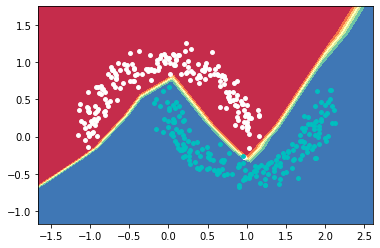

In [ ]:
# plot decision boundary
plot_decision_boundary(model, X, y)

## Handling large dataset: Mini-batch training

In real world, we always have to deal with datasets with large scale (e.g. millions of data).

In these cases, it is impractical for using gradient descent to optmize our parameters. 

Therefore, a more widely used method is to split the dataset into small batches and compute gradients based on the subset.

To utilize mimi-batch training, you need 
* Aggregate X and Y into `TensorDataset`
* Create `DataLoader` object and specify your batch size

In [ ]:
import torchvision
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

# 獲取訓練集dataset  
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),]
)
training_data = torchvision.datasets.MNIST(  
             root='./mnist/', # dataset儲存路徑  
             train=True, # True表示是train訓練集，False表示test測試集  
             transform=transform, # 將原資料規範化到（0,1）區間  
             download=True,  
             )  
test_data = torchvision.datasets.MNIST(  
             root='./mnist/', # dataset儲存路徑  
             train=False, # True表示是train訓練集，False表示test測試集  
             transform=transform, # 將原資料規範化到（0,1）區間  
             download=True,  
             )  

train_x, train_y = training_data.data, training_data.targets
test_x, test_y = test_data.data, test_data.targets
print("Training size:",train_x.shape)
print("Testing size:",test_x.shape)

Training size: torch.Size([60000, 28, 28])
Testing size: torch.Size([10000, 28, 28])


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
import torch.nn as nn

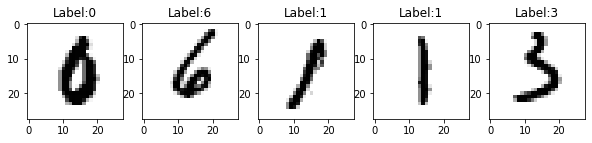

In [ ]:
samples = np.random.randint(0,train_x.size(0),size=5)
plt.figure(figsize=(10,7))
for i in range(1,6):
  plt.subplot(f"15{i}")
  plt.imshow(train_x[samples[i-1]].numpy(),cmap="binary")
  plt.title(f"Label:{train_y[samples[i-1]]}")

In [ ]:
# combine X and Y into tensordataset
train_dataset = TensorDataset(train_x,train_y)

# create a dataloader
# Note: you CAN NOT feed torch.tensor into dataloader
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4
)

for batch in train_loader:
  # batch is a tuple containing x and y
  batch_x, batch_y = batch
  print(batch_x.shape)
  print(batch_y.shape)
  break

torch.Size([32, 28, 28])
torch.Size([32])


In [ ]:
# define model and other configs
model = nn.Sequential(
          nn.Linear(28*28,256),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(256,128),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(128,10)
        )
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# combine dataloader with model training
num_epochs = 1
for epoch in range(num_epochs):
  for batch_idx, batch in enumerate(train_loader):
    batch_x, batch_y = batch
    batch_x = batch_x.float()
    output = model(batch_x.view(-1,28*28))
    loss = loss_func(output,batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch_idx % 300 ==0:
      pred_y = torch.max(output,1)[1].data.squeeze()
      accuracy = sum(pred_y==batch_y) / float(batch_y.size(0))
      print("Loss: %.4f, Accuracy: %.4f" % (loss.item(), accuracy))

Loss: 15.7702, Accuracy: 0.1250
Loss: 0.0873, Accuracy: 0.9688
Loss: 0.0559, Accuracy: 0.9688
Loss: 0.3393, Accuracy: 0.9062
Loss: 0.3742, Accuracy: 0.9062
Loss: 0.1361, Accuracy: 0.9688
Loss: 0.0633, Accuracy: 0.9688


In [ ]:
import numpy as np 

def evaluate(model, loader):
  model.eval()
  loss_function = nn.CrossEntropyLoss()
  predictions = []
  loss = []
  true_labels = test_loader.dataset.tensors[1].numpy()
  for batch in loader:
    batch_x, batch_y = batch
    batch_x = batch_x.view(-1,28*28).float()
    y_pred = model(batch_x)
    _loss = loss_function(y_pred, batch_y).detach().numpy().flatten()
    y_pred = np.argmax(y_pred.detach().numpy(),axis=1)
    predictions.extend(y_pred)
    loss.extend(_loss)
  predictions = np.array(predictions)
  acc = np.mean(predictions==true_labels)
  avg_loss = np.mean(loss)
  return acc, avg_loss

# Ways to prevent overfitting
Overfitting occurs when the model performs well on training data but generalizes poorly to unseen data. 

Overfitting is a very common problem in Machine Learning and there has been an extensive range of literature dedicated to studying methods for preventing overfitting. 

In the following, I’ll describe a few simple approaches to alleviate overfitting
* Regularization in network: `Dropout`
* Regularization in parameters: L1/L2 regularization

### Dropout mechanism 

In [ ]:
regular_model = nn.Sequential(
          nn.Linear(28*28,256),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(256,128),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(128,10)
        )

droped_model = nn.Sequential(
          nn.Linear(28*28,256),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Dropout(0.3),
          nn.Linear(256,128),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Dropout(0.3),
          nn.Linear(128,10)
        )

In [ ]:
import numpy as np 

def evaluate(model, loader):
  model.eval()
  loss_function = nn.CrossEntropyLoss()
  predictions = []
  loss = []
  true_labels = test_loader.dataset.tensors[1].numpy()
  for batch in loader:
    batch_x, batch_y = batch
    batch_x = batch_x.view(-1,28*28).float()
    y_pred = model(batch_x)
    _loss = loss_function(y_pred, batch_y).detach().numpy().flatten()
    y_pred = np.argmax(y_pred.detach().numpy(),axis=1)
    predictions.extend(y_pred)
    loss.extend(_loss)
  predictions = np.array(predictions)
  acc = np.mean(predictions==true_labels)
  avg_loss = np.mean(loss)
  return acc, avg_loss

In [ ]:
# Train regular model
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(regular_model.parameters())

# combine dataloader with model training
num_epochs = 5
for epoch in range(num_epochs):
  regular_model.train() # training state
  for batch_idx, batch in enumerate(train_loader):
    batch_x, batch_y = batch
    batch_x = batch_x.float()
    output = regular_model(batch_x.view(-1,28*28))
    loss = loss_func(output,batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch_idx % 300 ==0:
      pred_y = torch.max(output,1)[1].data.squeeze()
      accuracy = sum(pred_y==batch_y) / float(batch_y.size(0))
      print("Loss: %.4f, Accuracy: %.4f" % (loss.item(), accuracy))

Loss: 13.2920, Accuracy: 0.2188
Loss: 0.0684, Accuracy: 1.0000
Loss: 0.6306, Accuracy: 0.8750
Loss: 0.1021, Accuracy: 0.9688
Loss: 0.1338, Accuracy: 0.9062
Loss: 0.1296, Accuracy: 0.9688
Loss: 0.0227, Accuracy: 1.0000


In [ ]:
# Train dropout model
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(droped_model.parameters())

# combine dataloader with model training
num_epochs = 5
for epoch in range(num_epochs):
  for batch_idx, batch in enumerate(train_loader):
    droped_model.train() # training state
    batch_x, batch_y = batch
    batch_x = batch_x.float()
    output = droped_model(batch_x.view(-1,28*28))
    loss = loss_func(output,batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch_idx % 300 ==0:
      pred_y = torch.max(output,1)[1].data.squeeze()
      accuracy = sum(pred_y==batch_y) / float(batch_y.size(0))
      print("Loss: %.4f, Accuracy: %.4f" % (loss.item(), accuracy))

Loss: 13.5142, Accuracy: 0.1875
Loss: 0.8131, Accuracy: 0.8125
Loss: 0.4295, Accuracy: 0.8750
Loss: 0.5532, Accuracy: 0.8438
Loss: 0.1795, Accuracy: 0.9688
Loss: 0.4558, Accuracy: 0.8750
Loss: 0.0105, Accuracy: 1.0000


In [ ]:
regular_acc, regular_loss = evaluate(regular_model, test_loader)
droped_acc, droped_loss = evaluate(droped_model, test_loader)
print("[Regular model]  Test Acc: %.4f Loss: %.4f" %(regular_acc, regular_loss))
print("[Dropout model]  Test Acc: %.4f Loss: %.4f" %(droped_acc, droped_loss))

[Regular model]  Test Acc: 0.9536 Loss: 0.1685
[Dropout model]  Test Acc: 0.9387 Loss: 0.2008


### L2 regularization 

In [ ]:
regular_model = nn.Sequential(
          nn.Linear(28*28,256),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(256,128),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(128,10)
        )
# Train regular model
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(regular_model.parameters(), lr=0.01)

# combine dataloader with model training
num_epochs = 5
for epoch in range(num_epochs):
  regular_model.train() # training state
  for batch_idx, batch in enumerate(train_loader):
    batch_x, batch_y = batch
    batch_x = batch_x.float()
    output = regular_model(batch_x.view(-1,28*28))
    loss = loss_func(output,batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch_idx % 600 ==0:
      pred_y = torch.max(output,1)[1].data.squeeze()
      accuracy = sum(pred_y==batch_y) / float(batch_y.size(0))
      print("Loss: %.4f, Accuracy: %.4f" % (loss.item(), accuracy))

regular_acc, regular_loss = evaluate(regular_model, test_loader)
print("[Regular model]  Test Acc: %.4f Loss: %.4f" %(regular_acc, regular_loss))

Loss: 13.8708, Accuracy: 0.1562
Loss: 0.4099, Accuracy: 0.8750
Loss: 1.8400, Accuracy: 0.8750
Loss: 5.6229, Accuracy: 0.7500
Loss: 6.8111, Accuracy: 0.7812
Loss: 7.0559, Accuracy: 0.8125
Loss: 2.4800, Accuracy: 0.9375
Loss: 4.9132, Accuracy: 0.9688
Loss: 5.1594, Accuracy: 0.9375
Loss: 1.7486, Accuracy: 0.9062
Loss: 17.2829, Accuracy: 0.8750
Loss: 6.0736, Accuracy: 0.9375
Loss: 25.8738, Accuracy: 0.7500
Loss: 11.3435, Accuracy: 0.9375
Loss: 16.2056, Accuracy: 0.9062
Loss: 9.9610, Accuracy: 0.9688
Loss: 38.1955, Accuracy: 0.8438
Loss: 15.8799, Accuracy: 0.8125
Loss: 21.9490, Accuracy: 0.8438
Loss: 0.0000, Accuracy: 1.0000
[Regular model]  Test Acc: 0.8919 Loss: 16.3433


In [ ]:
regular_model = nn.Sequential(
          nn.Linear(28*28,256),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(256,128),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(128,10)
        )
# Train regular model
loss_func = nn.CrossEntropyLoss()
# Built-in L2 reg in optimizer!
optimizer = torch.optim.Adam(regular_model.parameters(), weight_decay=0.0001,lr=0.01)

# combine dataloader with model training
num_epochs = 5
for epoch in range(num_epochs):
  regular_model.train() # training state
  for batch_idx, batch in enumerate(train_loader):
    batch_x, batch_y = batch
    batch_x = batch_x.float()
    output = regular_model(batch_x.view(-1,28*28))
    loss = loss_func(output,batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch_idx % 600 ==0:
      pred_y = torch.max(output,1)[1].data.squeeze()
      accuracy = sum(pred_y==batch_y) / float(batch_y.size(0))
      print("Loss: %.4f, Accuracy: %.4f" % (loss.item(), accuracy))

regular_acc, regular_loss = evaluate(regular_model, test_loader)
print("[L2-regularized model]  Test Acc: %.4f Loss: %.4f" %(regular_acc, regular_loss))

Loss: 15.1341, Accuracy: 0.0938
Loss: 1.1463, Accuracy: 0.7500
Loss: 6.8678, Accuracy: 0.5938
Loss: 20.5626, Accuracy: 0.8125
Loss: 37.0845, Accuracy: 0.9062
Loss: 5.6523, Accuracy: 0.9375
Loss: 9.3873, Accuracy: 0.8438
Loss: 8.0861, Accuracy: 0.8750
Loss: 3.7484, Accuracy: 0.8750
Loss: 9.4615, Accuracy: 0.9375
Loss: 6.6958, Accuracy: 0.9375
Loss: 8.2243, Accuracy: 0.9062
Loss: 3.3716, Accuracy: 0.9688
Loss: 1.4825, Accuracy: 0.9375
Loss: 12.5259, Accuracy: 0.8438
Loss: 10.4267, Accuracy: 0.8125
Loss: 15.5535, Accuracy: 0.9375
Loss: 24.1580, Accuracy: 0.8750
Loss: 15.2670, Accuracy: 0.9062
Loss: 23.2248, Accuracy: 0.9062
[L2-regularized model]  Test Acc: 0.9062 Loss: 16.0122


# Batch Normalization
In the following example, you will find out how batch normalization reduces the impact of initialization.

How initialization impact our model during training? 
 Take a look at the following figure.

You will find that when input belongs to this interval $[-1,1]$. The `Tanh` activation will have a large gradient. 

If the input is in $(2,\infty)$ or $(-\infty,-2)$, then the gradient of network will be small and therefore the model can not update parameters anymore!!

<img src="https://mofanpy.com/static/results/torch/5-4-8.png" width=400>

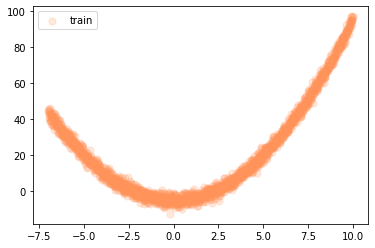

In [ ]:
import torch
from torch import nn
from torch.nn import init
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


# training data
N = 2000
x = np.linspace(-7, 10, N)[:, np.newaxis]
noise = np.random.normal(0, 2, x.shape)
y = np.square(x) - 5 + noise

# test data
test_x = np.linspace(-7, 10, 200)[:, np.newaxis]
noise = np.random.normal(0, 2, test_x.shape)
test_y = np.square(test_x) - 5 + noise

train_x, train_y = torch.from_numpy(x).float(), torch.from_numpy(y).float()
test_x = torch.from_numpy(test_x).float()
test_y = torch.from_numpy(test_y).float()

batch_size = 64
train_dataset = Data.TensorDataset(train_x, train_y)
train_loader = Data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2,)

# show data
plt.scatter(train_x.numpy(), train_y.numpy(), c='#FF9359', s=50, alpha=0.2, label='train')
plt.legend(loc='upper left')
plt.show()

In [ ]:
class Dense(nn.Module):
  def __init__(self, in_channel, out_channel, use_bn=True):
    super(Dense, self).__init__()
    self.layer = nn.Linear(in_channel, out_channel)
    self.act = nn.ReLU()
    self.bn = nn.BatchNorm1d(out_channel)
    self.use_bn = use_bn

  def forward(self,x):
    if self.use_bn:
      return self.act(self.bn(self.layer(x)))
    else:
      return self.act(self.layer(x))

class Network(nn.Module):
  def __init__(self,use_bn=True):
    super(Network, self).__init__()
    self.use_bn = use_bn
    self.input_layer = nn.Linear(1,10)
    self.input_bn = nn.BatchNorm1d(10)
    self.act = nn.ReLU()
    self.hiddens = nn.ModuleList([Dense(10,10,self.use_bn) for _ in range(5)])
    self.output_layer = nn.Linear(10,1)

  def forward(self,x):
    if self.use_bn:
      hidden = self.act(self.input_bn(self.input_layer(x)))
    else:
      hidden = self.act(self.input_layer(x))
    for i in range(5):
      hidden = self.hiddens[i](hidden)
    out = self.output_layer(hidden)
    return out

def weights_init(m):
    if isinstance(m, nn.Linear):
        m.bias.data = torch.FloatTensor([-0.2])

Loss: 1177.0824
Loss: 973.5992
Loss: 829.0828
Loss: 1125.9685
Loss: 903.6395
Loss: 1066.8048
Loss: 841.0826
Loss: 844.8811
Loss: 964.2402
Loss: 1049.6078
Loss: 1478.6569
Loss: 887.3167
Loss: 632.0125
Loss: 779.9286
Loss: 799.3350
Loss: 907.8305
Loss: 1130.8705
Loss: 801.6651
Loss: 642.0872
Loss: 915.2360


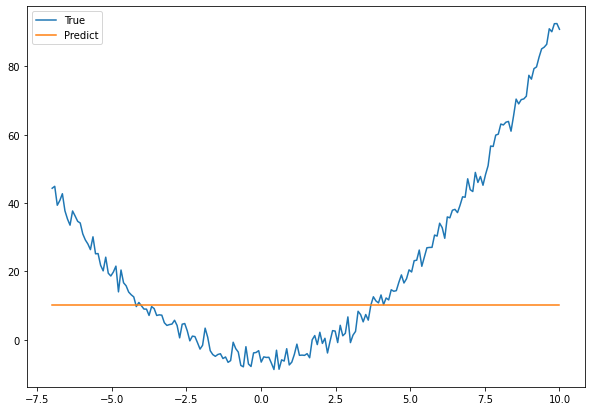

In [ ]:
# Init with a BAD Bias 
# CANNOT trained without Batchnorm
model = Network(use_bn=False)
model.apply(weights_init)
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
loss_function = nn.MSELoss()

epochs = 10
for _ in range(epochs):
  for idx, (batch_x, batch_y) in enumerate(train_loader):
    pred = model(batch_x)
    loss = loss_function(pred, batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if idx % 24 ==0:
      print("Loss: %.4f" % loss.item())

y_pred = model(test_x).detach().numpy().flatten()
plt.figure(figsize=(10,7))
plt.plot(test_x.numpy(), test_y.numpy(), label="True")
plt.plot(test_x.numpy(), y_pred, label="Predict")
plt.legend()
plt.show()

Loss: 748.8812
Loss: 222.1081
Loss: 347.8832
Loss: 50.8334
Loss: 27.8246
Loss: 10.6050
Loss: 32.8389
Loss: 26.6051
Loss: 47.0323
Loss: 17.6245
Loss: 68.0038
Loss: 25.2508
Loss: 20.5560
Loss: 19.2779
Loss: 59.5665
Loss: 11.6336
Loss: 40.4523
Loss: 11.8892
Loss: 9.5654
Loss: 14.7914


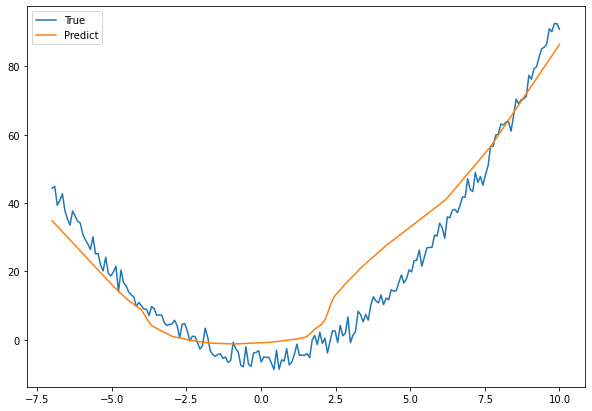

In [ ]:
# Init with a BAD Bias 
# Batch Norm reduces the impact of initialization
model = Network()
model.apply(weights_init)
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
loss_function = nn.MSELoss()

epochs = 10
for _ in range(epochs):
  for idx, (batch_x, batch_y) in enumerate(train_loader):
    pred = model(batch_x)
    loss = loss_function(pred, batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if idx % 24 ==0:
      print("Loss: %.4f" % loss.item())

y_pred = model(test_x).detach().numpy().flatten()
plt.figure(figsize=(10,7))
plt.plot(test_x.numpy(), test_y.numpy(), label="True")
plt.plot(test_x.numpy(), y_pred, label="Predict")
plt.legend()
plt.show()

# Sequence modeling with Recurrent Neural Network

Sequence models are the machine learning models that input or output sequences of data. Sequential data includes text streams, audio clips, video clips, time-series data and etc. 

Recurrent Neural Networks (RNNs) is a popular algorithm used in sequence models.

In the following example, we will implement a many-to-many RNN model to predict $y = cos(x)$ while using $sin(x)$ as feature.


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np 

class Network(nn.Module):
    def __init__(self,input_dim, hidden_dim=16):
        super(Network, self).__init__()
        self.rnn = nn.RNN(
            input_size=input_dim,
            hidden_size=hidden_dim,
            batch_first=True,
            dropout=0,
            num_layers=1,
        )
        self.output_layer = nn.Linear(hidden_dim,1)

    def forward(self,seq):
        # recurrent_output stores the hidden states of each timestep
        #  shape: (batch, timestep, dim)
        # hidden stores the hidden state of last timestep
        #  shape: (num_layers, batch, dim)
        recurrent_output, last_state = self.rnn(seq, None)
        batch, timestep, dim = recurrent_output.size()

        # reshape to (batch*timestep, dim)
        recurrent_output = recurrent_output.reshape(-1, dim) 
        outputs = self.output_layer(recurrent_output) # shape: (batch*timestep,1)
        outputs = outputs.view(batch, timestep, 1)
        return outputs

Loss 0.4665


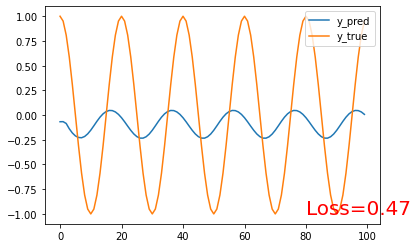

Loss 0.4050


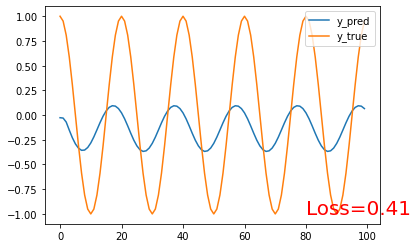

Loss 0.3172


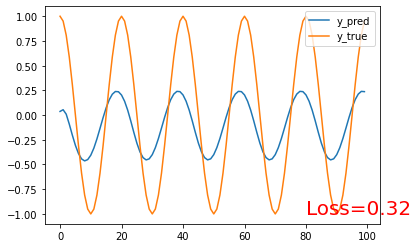

Loss 0.2103


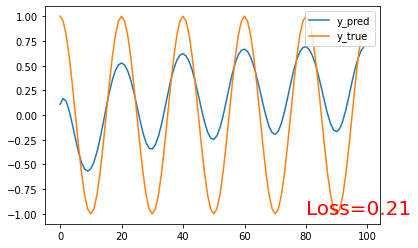

Loss 0.1173


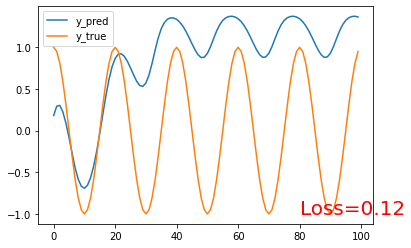

Loss 0.0661


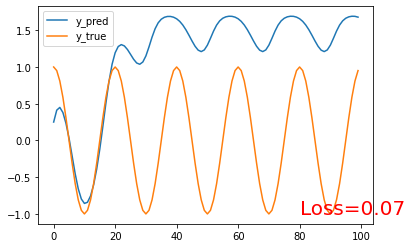

Loss 0.0487


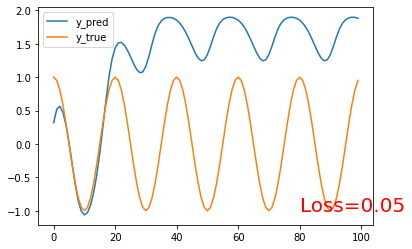

Loss 0.0411


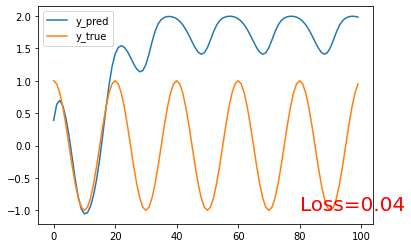

Loss 0.0269


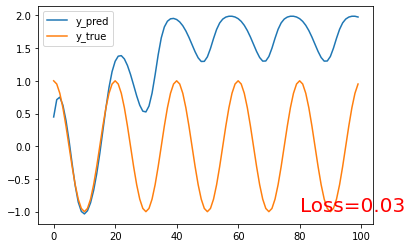

Loss 0.0166


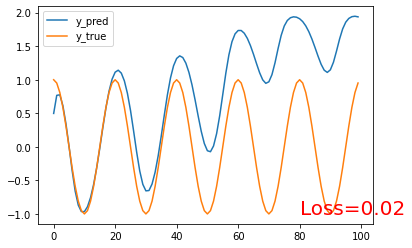

Loss 0.0149


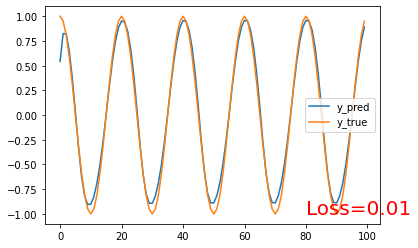

Loss 0.0137


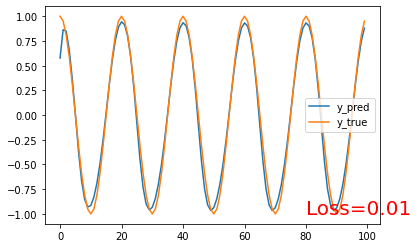

Loss 0.0113


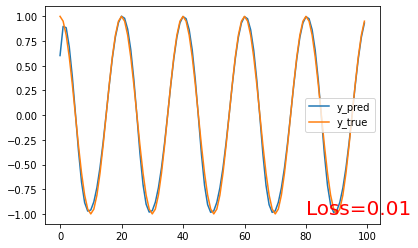

Loss 0.0105


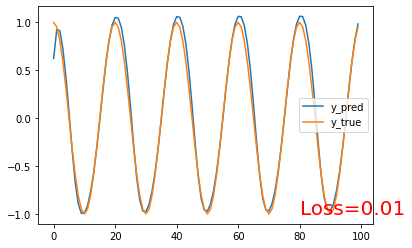

Loss 0.0101


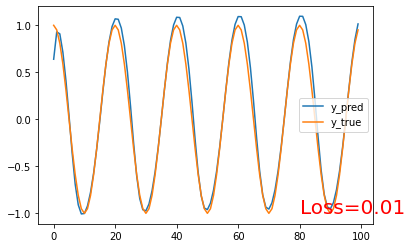

Loss 0.0090


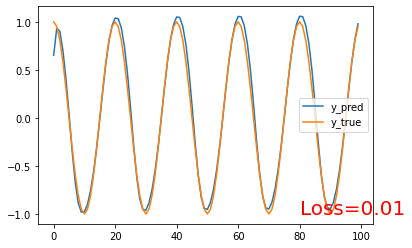

Loss 0.0083


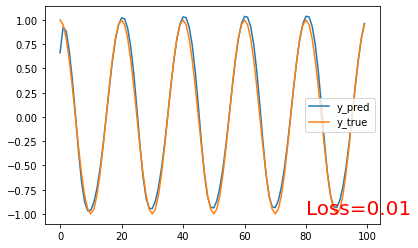

Loss 0.0077


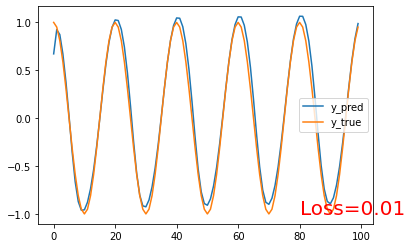

Loss 0.0071


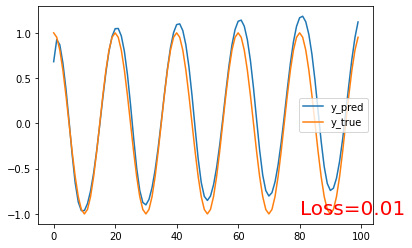

Loss 0.0066


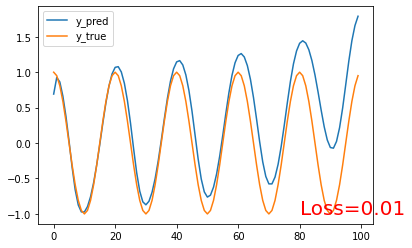

In [ ]:
# prepare data
train_x = torch.sin(torch.arange(-100,100,0.1)*np.pi).view(100,20,1)
train_y = torch.cos(torch.arange(-100,100,0.1)*np.pi).view(100,20,1)
test_x = torch.sin(torch.arange(100,110,0.1)*np.pi).view(1,100,1)
test_y = torch.cos(torch.arange(100,110,0.1)*np.pi).view(1,100,1)
iterations = 100

# define model
model = Network(input_dim=1)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

# start training
plt.ion()   
plt.show()
for step in range(iterations):
    y_hat = model(train_x)
    loss = loss_function(y_hat, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (step +1 )% 5 ==0:
        print("Loss %.4f" % loss.item())

        # plot resutls
        plt.cla()
        y_hat = model(test_x).flatten().detach().numpy()
        y_true = test_y.flatten().numpy()
        plt.plot(range(len(y_hat)), y_hat, label="y_pred")
        plt.plot(range(len(y_true)), y_true, label="y_true")
        plt.legend()
        plt.text(80, -1, 'Loss=%.2f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

# Image Classification with Convolution Neural Network
In the following block, I implement a CNN framework with 2-layer convolution operation and pooling.

### Step 1: Load MNIST dataset

In [ ]:
import torchvision
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

# 獲取訓練集dataset  
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),]
)
training_data = torchvision.datasets.MNIST(  
             root='./mnist/', # dataset儲存路徑  
             train=True, # True表示是train訓練集，False表示test測試集  
             transform=transform, # 將原資料規範化到（0,1）區間  
             download=True,  
             )  
test_data = torchvision.datasets.MNIST(  
             root='./mnist/', # dataset儲存路徑  
             train=False, # True表示是train訓練集，False表示test測試集  
             transform=transform, # 將原資料規範化到（0,1）區間  
             download=True,  
             )  

train_x, train_y = training_data.data, training_data.targets
test_x, test_y = test_data.data, test_data.targets
print("Training size:",train_x.shape)
print("Testing size:",test_x.shape)

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw
Processing...
Done!
Training size: torch.Size([60000, 28, 28])
Testing size: torch.Size([10000, 28, 28])




/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# combine X and Y into tensordataset
train_dataset = TensorDataset(train_x,train_y)
test_dataset = TensorDataset(test_x,test_y)

# create a dataloader
# Note: you CAN NOT feed torch.tensor into dataloader
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=4
)

### Step 2: Define Network

In [ ]:
import torch
import torch.nn as nn 

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.activation = nn.ReLU()
        # shape: (1,28,28) -> (16,24,24)
        self.cnn1 = nn.Conv2d(
            in_channels=1, # binary image
            out_channels= 16, # 16 filters
            kernel_size=5,
            padding=0, # no padding
            stride=1,
        ) 
        # shape: (16,24,24) -> (16,12,12)
        self.pooling1 = nn.MaxPool2d(kernel_size=2)
        # shape: (16,12,12) -> (32,8,8)
        self.cnn2 = nn.Conv2d(
            in_channels=16, 
            out_channels=32, 
            kernel_size=5,
        )
        # shape: (16,12,12) -> (32,4,4)
        self.pooling2 = nn.MaxPool2d(kernel_size=2)
        self.output_layer = nn.Linear(32*4*4, 10)

    def forward(self,x):
        # Conv Block 1
        hidden_1 = self.cnn1(x)
        activation_1 = self.activation(hidden_1)
        pool_1 = self.pooling1(activation_1)

        # Conv Block 2
        hidden_2 = self.cnn2(pool_1)
        activation_2 = self.activation(hidden_2)
        pool_2 = self.pooling2(activation_2)

        # Output
        flatten = pool_2.view(pool_2.size(0), -1)
        out = self.output_layer(flatten)

        return out


### Step 3: Start Training

In [ ]:
import numpy as np 

def evaluate(model, loader):
  loss_function = nn.CrossEntropyLoss()
  predictions = []
  loss = []
  true_labels = test_loader.dataset.tensors[1].numpy()
  for batch in loader:
    batch_x, batch_y = batch
    batch_x = batch_x.view(-1,1,28,28).float()
    y_pred = model(batch_x)
    _loss = loss_function(y_pred, batch_y).detach().numpy().flatten()
    y_pred = np.argmax(y_pred.detach().numpy(),axis=1)
    predictions.extend(y_pred)
    loss.extend(_loss)
  predictions = np.array(predictions)
  acc = np.mean(predictions==true_labels)
  avg_loss = np.mean(loss)
  return acc, avg_loss
  

In [ ]:
# basic configs
model = CNNModel()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# start training 
num_epochs = 2
for epoch in range(num_epochs):
  for batch_idx, batch in enumerate(train_loader):
    batch_x, batch_y = batch
    batch_x = batch_x.float().view(-1,1,28,28)
    output = model(batch_x)
    loss = loss_function(output,batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch_idx % 300 ==0:
      pred_y = torch.max(output,1)[1].data.squeeze()
      accuracy = sum(pred_y==batch_y) / float(batch_y.size(0))
      print("Train Loss: %.4f, Train Accuracy: %.4f" % (loss.item(), accuracy))
  test_acc, test_loss = evaluate(model,test_loader)
  print("Test Acc: %.4f Loss: %.4f" %(test_acc, test_loss))

Train Loss: 31.6709, Train Accuracy: 0.0000
Train Loss: 0.3674, Train Accuracy: 0.9062
Train Loss: 0.3636, Train Accuracy: 0.9062
Train Loss: 0.3762, Train Accuracy: 0.9062
Train Loss: 0.4777, Train Accuracy: 0.8438
Train Loss: 0.3019, Train Accuracy: 0.9375
Train Loss: 0.0060, Train Accuracy: 1.0000
Test Acc: 0.9258 Loss: 0.2906
Train Loss: 0.7451, Train Accuracy: 0.8750
Train Loss: 1.0892, Train Accuracy: 0.8750
Train Loss: 0.3635, Train Accuracy: 0.9062
Train Loss: 0.5367, Train Accuracy: 0.8438
Train Loss: 0.5362, Train Accuracy: 0.9375
Train Loss: 0.2561, Train Accuracy: 0.9062
Train Loss: 0.3747, Train Accuracy: 0.9062
Test Acc: 0.9258 Loss: 0.2705


### Improve CNN with Batch Normalization
Recall we used batch normalization in FC layer.

`BatchNorm2d` can be used in convolution to further increase the performance and convergence speed.

In [ ]:
import torch
import torch.nn as nn 

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.activation = nn.ReLU()
        # shape: (1,28,28) -> (16,24,24)
        self.cnn1 = nn.Conv2d(
            in_channels=1, # binary image
            out_channels= 16, # 16 filters
            kernel_size=5,
            padding=0, # no padding
            stride=1,
        ) 
        self.conv1_bn = nn.BatchNorm2d(16)
        # shape: (16,24,24) -> (16,12,12)
        self.pooling1 = nn.MaxPool2d(kernel_size=2)
        # shape: (16,12,12) -> (32,8,8)
        self.cnn2 = nn.Conv2d(
            in_channels=16, 
            out_channels=32, 
            kernel_size=5,
        )
        self.conv2_bn = nn.BatchNorm2d(32)
        # shape: (16,12,12) -> (32,4,4)
        self.pooling2 = nn.MaxPool2d(kernel_size=2)
        self.output_layer = nn.Linear(32*4*4, 10)

    def forward(self,x):
        # Conv Block 1
        hidden_1 = self.cnn1(x)
        hidden_1 = self.conv1_bn(hidden_1)
        activation_1 = self.activation(hidden_1)
        pool_1 = self.pooling1(activation_1)

        # Conv Block 2
        hidden_2 = self.cnn2(pool_1)
        hidden_2 = self.conv2_bn(hidden_2)
        activation_2 = self.activation(hidden_2)
        pool_2 = self.pooling2(activation_2)

        # Output
        flatten = pool_2.view(pool_2.size(0), -1)
        out = self.output_layer(flatten)

        return out


In [ ]:
# basic configs
model = CNNModel()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# start training 
num_epochs = 2
for epoch in range(num_epochs):
  for batch_idx, batch in enumerate(train_loader):
    batch_x, batch_y = batch
    batch_x = batch_x.float().view(-1,1,28,28)
    output = model(batch_x)
    loss = loss_function(output,batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch_idx % 300 ==0:
      pred_y = torch.max(output,1)[1].data.squeeze()
      accuracy = sum(pred_y==batch_y) / float(batch_y.size(0))
      print("Train Loss: %.4f, Train Accuracy: %.4f" % (loss.item(), accuracy))
  test_acc, test_loss = evaluate(model,test_loader)
  print("Test Acc: %.4f Loss: %.4f" %(test_acc, test_loss))

Train Loss: 2.8172, Train Accuracy: 0.0938
Train Loss: 0.1158, Train Accuracy: 0.9375
Train Loss: 0.0091, Train Accuracy: 1.0000
Train Loss: 0.0163, Train Accuracy: 1.0000
Train Loss: 0.0245, Train Accuracy: 1.0000
Train Loss: 0.1082, Train Accuracy: 0.9688
Train Loss: 0.1260, Train Accuracy: 0.9688
Test Acc: 0.9853 Loss: 0.0455
Train Loss: 0.1419, Train Accuracy: 0.9375
Train Loss: 0.0423, Train Accuracy: 0.9688
Train Loss: 0.0441, Train Accuracy: 0.9688
Train Loss: 0.0942, Train Accuracy: 0.9688
Train Loss: 0.0046, Train Accuracy: 1.0000
Train Loss: 0.0208, Train Accuracy: 1.0000
Train Loss: 0.0032, Train Accuracy: 1.0000
Test Acc: 0.9869 Loss: 0.0394
